In [1]:
import tensorflow as tf

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [2]:
print(tf.__version__)

1.14.0


In [3]:
!pip install --user gast==0.2.2

In [4]:
tf.logging.set_verbosity(tf.logging.INFO)
tf.logging.set_verbosity(tf.logging.ERROR)

In [5]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pylab import rcParams
import itertools

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [7]:
train_set = pd.read_csv('gdrive/MyDrive/train.csv')
test_set = pd.read_csv('gdrive/MyDrive/test.csv')

In [8]:
train = train_set.copy()
print('Train data shape all features:', train.shape)
train = train.select_dtypes(exclude=['object'])

print('Train data shape numerical features:', train.shape)
train.drop('Id', axis=1, inplace=True)
train.fillna(0, inplace=True)

test = test_set.copy()
test = test.select_dtypes(exclude=['object'])
ID = test.Id
test.fillna(0, inplace=True)
test.drop('Id', axis=1, inplace=True)

print("All features list:", list(train.columns))

Train data shape all features: (1460, 81)
Train data shape numerical features: (1460, 38)
All features list: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest

In [10]:
# Handling outliers

clf = IsolationForest(max_samples=100, random_state=42)
clf.fit(train)
y_norm = clf.predict(train)
y_norm = pd.DataFrame(y_norm, columns=['Top'])
y_norm[y_norm['Top'] == 1].index.values

train = train.iloc[y_norm[y_norm['Top'] == 1].index.values]
train.reset_index(drop=True, inplace=True)

print("Nº outliers:", y_norm[y_norm['Top'] == -1].shape[0])
print("Nº rows without outliers:", train.shape[0])

Nº outliers: 149
Nº rows without outliers: 1311


In [11]:
train.head(10)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
5,50,85.0,14115,5,5,1993,1995,0.0,732,0,64,796,796,566,0,1362,1,0,1,1,1,1,5,0,1993.0,2,480,40,30,0,320,0,0,700,10,2009,143000
6,20,75.0,10084,8,5,2004,2005,186.0,1369,0,317,1686,1694,0,0,1694,1,0,2,0,3,1,7,1,2004.0,2,636,255,57,0,0,0,0,0,8,2007,307000
7,60,0.0,10382,7,6,1973,1973,240.0,859,32,216,1107,1107,983,0,2090,1,0,2,1,3,1,7,2,1973.0,2,484,235,204,228,0,0,0,350,11,2009,200000
8,50,51.0,6120,7,5,1931,1950,0.0,0,0,952,952,1022,752,0,1774,0,0,2,0,2,2,8,2,1931.0,2,468,90,0,205,0,0,0,0,4,2008,129900
9,190,50.0,7420,5,6,1939,1950,0.0,851,0,140,991,1077,0,0,1077,1,0,1,0,2,2,5,2,1939.0,1,205,0,4,0,0,0,0,0,1,2008,118000


In [12]:
# Data processing

import warnings
warnings.filterwarnings('ignore')

col_train = list(train.columns)
col_train_bis = list(train.columns)
col_train_bis.remove('SalePrice')

mat_train = np.matrix(train)
mat_test  = np.matrix(test)
mat_new = np.matrix(train.drop('SalePrice', axis=1))
mat_y = np.array(train.SalePrice).reshape((1311,1))

preProcess_y = MinMaxScaler()
preProcess_y.fit(mat_y)
preProcess = MinMaxScaler()
preProcess.fit(mat_train)
preProcess_test = MinMaxScaler()
preProcess_test.fit(mat_new)

train = pd.DataFrame(preProcess.transform(mat_train), columns=col_train)
test  = pd.DataFrame(preProcess_test.transform(mat_test), columns=col_train_bis)

train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.235294,0.207668,0.062802,0.625,0.428571,0.953488,0.883333,0.12250,0.375532,0.0,0.073457,0.266999,0.200384,0.530106,0.0,0.461538,0.5,0.0,0.666667,0.5,0.500000,0.0,0.555556,0.000000,0.996517,0.50,0.394245,0.000000,0.167582,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,0.427956
1,0.000000,0.255591,0.072904,0.500,0.857143,0.744186,0.433333,0.00000,0.520213,0.0,0.139079,0.393637,0.395014,0.000000,0.0,0.298984,0.0,0.5,0.666667,0.0,0.500000,0.0,0.333333,0.333333,0.983085,0.50,0.330935,0.404891,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,0.361238
2,0.235294,0.217252,0.087396,0.625,0.428571,0.937984,0.866667,0.10125,0.258511,0.0,0.212537,0.286962,0.231064,0.537554,0.0,0.489115,0.5,0.0,0.666667,0.5,0.500000,0.0,0.333333,0.333333,0.995522,0.50,0.437410,0.000000,0.115385,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,0.465021
3,0.294118,0.191693,0.072464,0.625,0.428571,0.271318,0.333333,0.00000,0.114894,0.0,0.264447,0.235808,0.250719,0.469274,0.0,0.464078,0.5,0.0,0.333333,0.0,0.500000,0.0,0.444444,0.333333,0.994030,0.75,0.461871,0.000000,0.096154,0.824242,0.0,0.0,0.0,0.0,0.090909,0.00,0.258690
4,0.235294,0.268371,0.113835,0.750,0.428571,0.930233,0.833333,0.21875,0.348404,0.0,0.239961,0.357143,0.338926,0.653631,0.0,0.638607,0.5,0.0,0.666667,0.5,0.666667,0.0,0.666667,0.333333,0.995025,0.75,0.601439,0.260870,0.230769,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,0.530504


In [13]:
# List of features
COLUMNS = col_train
FEATURES = col_train_bis
LABEL = "SalePrice"

# Columns for tensorflow
feature_cols = [tf.contrib.layers.real_valued_column(k) for k in FEATURES]

# Training set and prediction set with target variables
training_set = train[COLUMNS]
prediction_set = train.SalePrice

# Training set
x_train, x_test, y_train, y_test = train_test_split(training_set[FEATURES], prediction_set, test_size=0.33, random_state=42)
y_train = pd.DataFrame(y_train, columns=[LABEL])
training_set = pd.DataFrame(x_train, columns=FEATURES).merge(y_train, left_index=True, right_index=True)
training_set.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
987,0.176471,0.159744,0.041283,0.250,0.571429,0.434109,0.000000,0.00000,0.357447,0.0,0.000000,0.209607,0.152924,0.351955,0.0,0.321480,0.0,0.0,0.333333,0.0,0.500000,0.0,0.333333,0.000000,0.963184,0.25,0.172662,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.545455,0.75,0.229038
894,0.000000,0.000000,0.082205,0.375,0.571429,0.627907,0.183333,0.00000,0.486702,0.0,0.066112,0.327511,0.293384,0.000000,0.0,0.222061,0.5,0.0,0.333333,0.0,0.500000,0.0,0.333333,0.000000,0.975622,0.25,0.264748,0.000000,0.876374,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00,0.250041
376,0.000000,0.000000,0.134696,0.500,0.714286,0.751938,0.833333,0.07875,0.662766,0.0,0.174339,0.499688,0.558006,0.000000,0.0,0.422351,0.0,0.5,0.666667,0.0,0.500000,0.0,0.555556,0.333333,0.983582,0.50,0.380576,0.326087,0.000000,0.0,0.000000,0.0,0.0,0.0,0.454545,0.75,0.444018
582,0.235294,0.223642,0.065438,0.625,0.428571,0.899225,0.766667,0.00000,0.000000,0.0,0.430950,0.274485,0.225791,0.500931,0.0,0.463716,0.0,0.0,0.666667,0.5,0.333333,0.0,0.444444,0.333333,0.993035,0.50,0.368345,0.000000,0.329670,0.0,0.000000,0.0,0.0,0.0,0.545455,0.75,0.384713
843,0.235294,0.000000,0.065481,0.625,0.428571,0.922481,0.816667,0.18625,0.410638,0.0,0.107738,0.309420,0.279962,0.644320,0.0,0.588534,0.5,0.0,0.666667,0.5,0.500000,0.0,0.555556,0.333333,0.994527,0.50,0.280576,0.000000,0.000000,0.0,0.330709,0.0,0.0,0.0,0.454545,0.75,0.441546


In [14]:
# Testing set
y_test = pd.DataFrame(y_test, columns=[LABEL])
testing_set = pd.DataFrame(x_test, columns=FEATURES).merge(y_test, left_index=True, right_index=True)
testing_set.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
1120,0.323529,0.191693,0.072904,0.500,0.428571,0.286822,0.000000,0.000000,0.169681,0.0,0.203722,0.229258,0.333653,0.573557,0.0,0.587808,0.0,0.0,0.333333,0.5,0.500000,0.0,0.555556,0.333333,0.970149,0.50,0.284892,0.000000,0.000000,0.784848,0.0,0.0,0.0,0.0,0.272727,0.50,0.232744
1072,0.588235,0.000000,0.028107,0.500,0.428571,0.922481,0.816667,0.265625,0.469681,0.0,0.166993,0.381784,0.376798,0.000000,0.0,0.285196,0.5,0.0,0.666667,0.0,0.333333,0.0,0.222222,0.000000,0.994527,0.50,0.289209,0.000000,0.835165,0.000000,0.0,0.0,0.0,0.0,0.454545,0.75,0.320466
198,0.235294,0.000000,0.059447,0.500,0.428571,0.945736,0.866667,0.000000,0.000000,0.0,0.494613,0.315034,0.274209,0.780261,0.0,0.663643,0.0,0.0,0.666667,0.5,0.666667,0.0,0.555556,0.333333,0.996020,0.50,0.280576,0.163043,0.126374,0.000000,0.0,0.0,0.0,0.0,1.000000,0.75,0.406952
575,0.000000,0.271565,0.069276,0.875,0.428571,1.000000,0.983333,0.101250,0.596277,0.0,0.315867,0.550842,0.636625,0.000000,0.0,0.481858,0.5,0.0,0.666667,0.5,0.333333,0.0,0.444444,0.333333,0.999502,0.75,0.343885,0.264946,0.357143,0.000000,0.0,0.0,0.0,0.0,0.818182,0.75,0.829197
331,0.176471,0.255591,0.138956,0.250,0.285714,0.612403,0.150000,0.000000,0.000000,0.0,0.000000,0.000000,0.326942,0.290503,0.0,0.417271,0.0,0.0,0.666667,0.0,0.666667,0.0,0.444444,0.333333,0.990547,0.50,0.489209,0.000000,0.162088,0.000000,0.0,0.0,0.0,0.0,0.545455,0.50,0.244931


In [15]:
training_set.reset_index(drop=True, inplace=True)

In [16]:
def input_fn(data_set, pred=False):
    
    if pred == False:       
        feature_cols = {k: tf.constant(data_set[k].values, shape=[data_set[k].size, 1]) for k in FEATURES}
        labels = tf.constant(data_set[LABEL].values)
        return feature_cols, labels

    if pred == True:
        feature_cols = {k: tf.constant(data_set[k].values, shape=[data_set[k].size, 1]) for k in FEATURES}
        return feature_cols

In [17]:
# Deep Neural Network for continuous features

# Model
regressor = tf.contrib.learn.DNNRegressor(feature_columns=feature_cols, 
                                          activation_fn = tf.nn.relu, hidden_units=[200, 100, 50, 25, 12])

# Deep Neural Network Regressor
regressor.fit(input_fn=lambda: input_fn(training_set), steps=2000)

# Test set evaluation
ev = regressor.evaluate(input_fn=lambda: input_fn(testing_set), steps=1)

In [18]:
loss_score1 = ev["loss"]
print("Loss: {0:f}".format(loss_score1))

Loss: 0.003420


In [19]:
# Predictions
y = regressor.predict(input_fn=lambda: input_fn(testing_set))
predictions = list(itertools.islice(y, testing_set.shape[0]))

In [20]:
predictions = pd.DataFrame(preProcess_y.inverse_transform(np.array(predictions).reshape(433,1)), columns=['Prediction'])

In [21]:
print(predictions)

        Prediction
0    154702.968750
1    163528.812500
2    201301.453125
3    303544.968750
4    120600.929688
..             ...
428  159611.531250
429  177099.843750
430  107760.406250
431  160506.468750
432  150711.031250

[433 rows x 1 columns]


In [22]:
truth = pd.DataFrame(preProcess.inverse_transform(testing_set), columns=[COLUMNS]).SalePrice

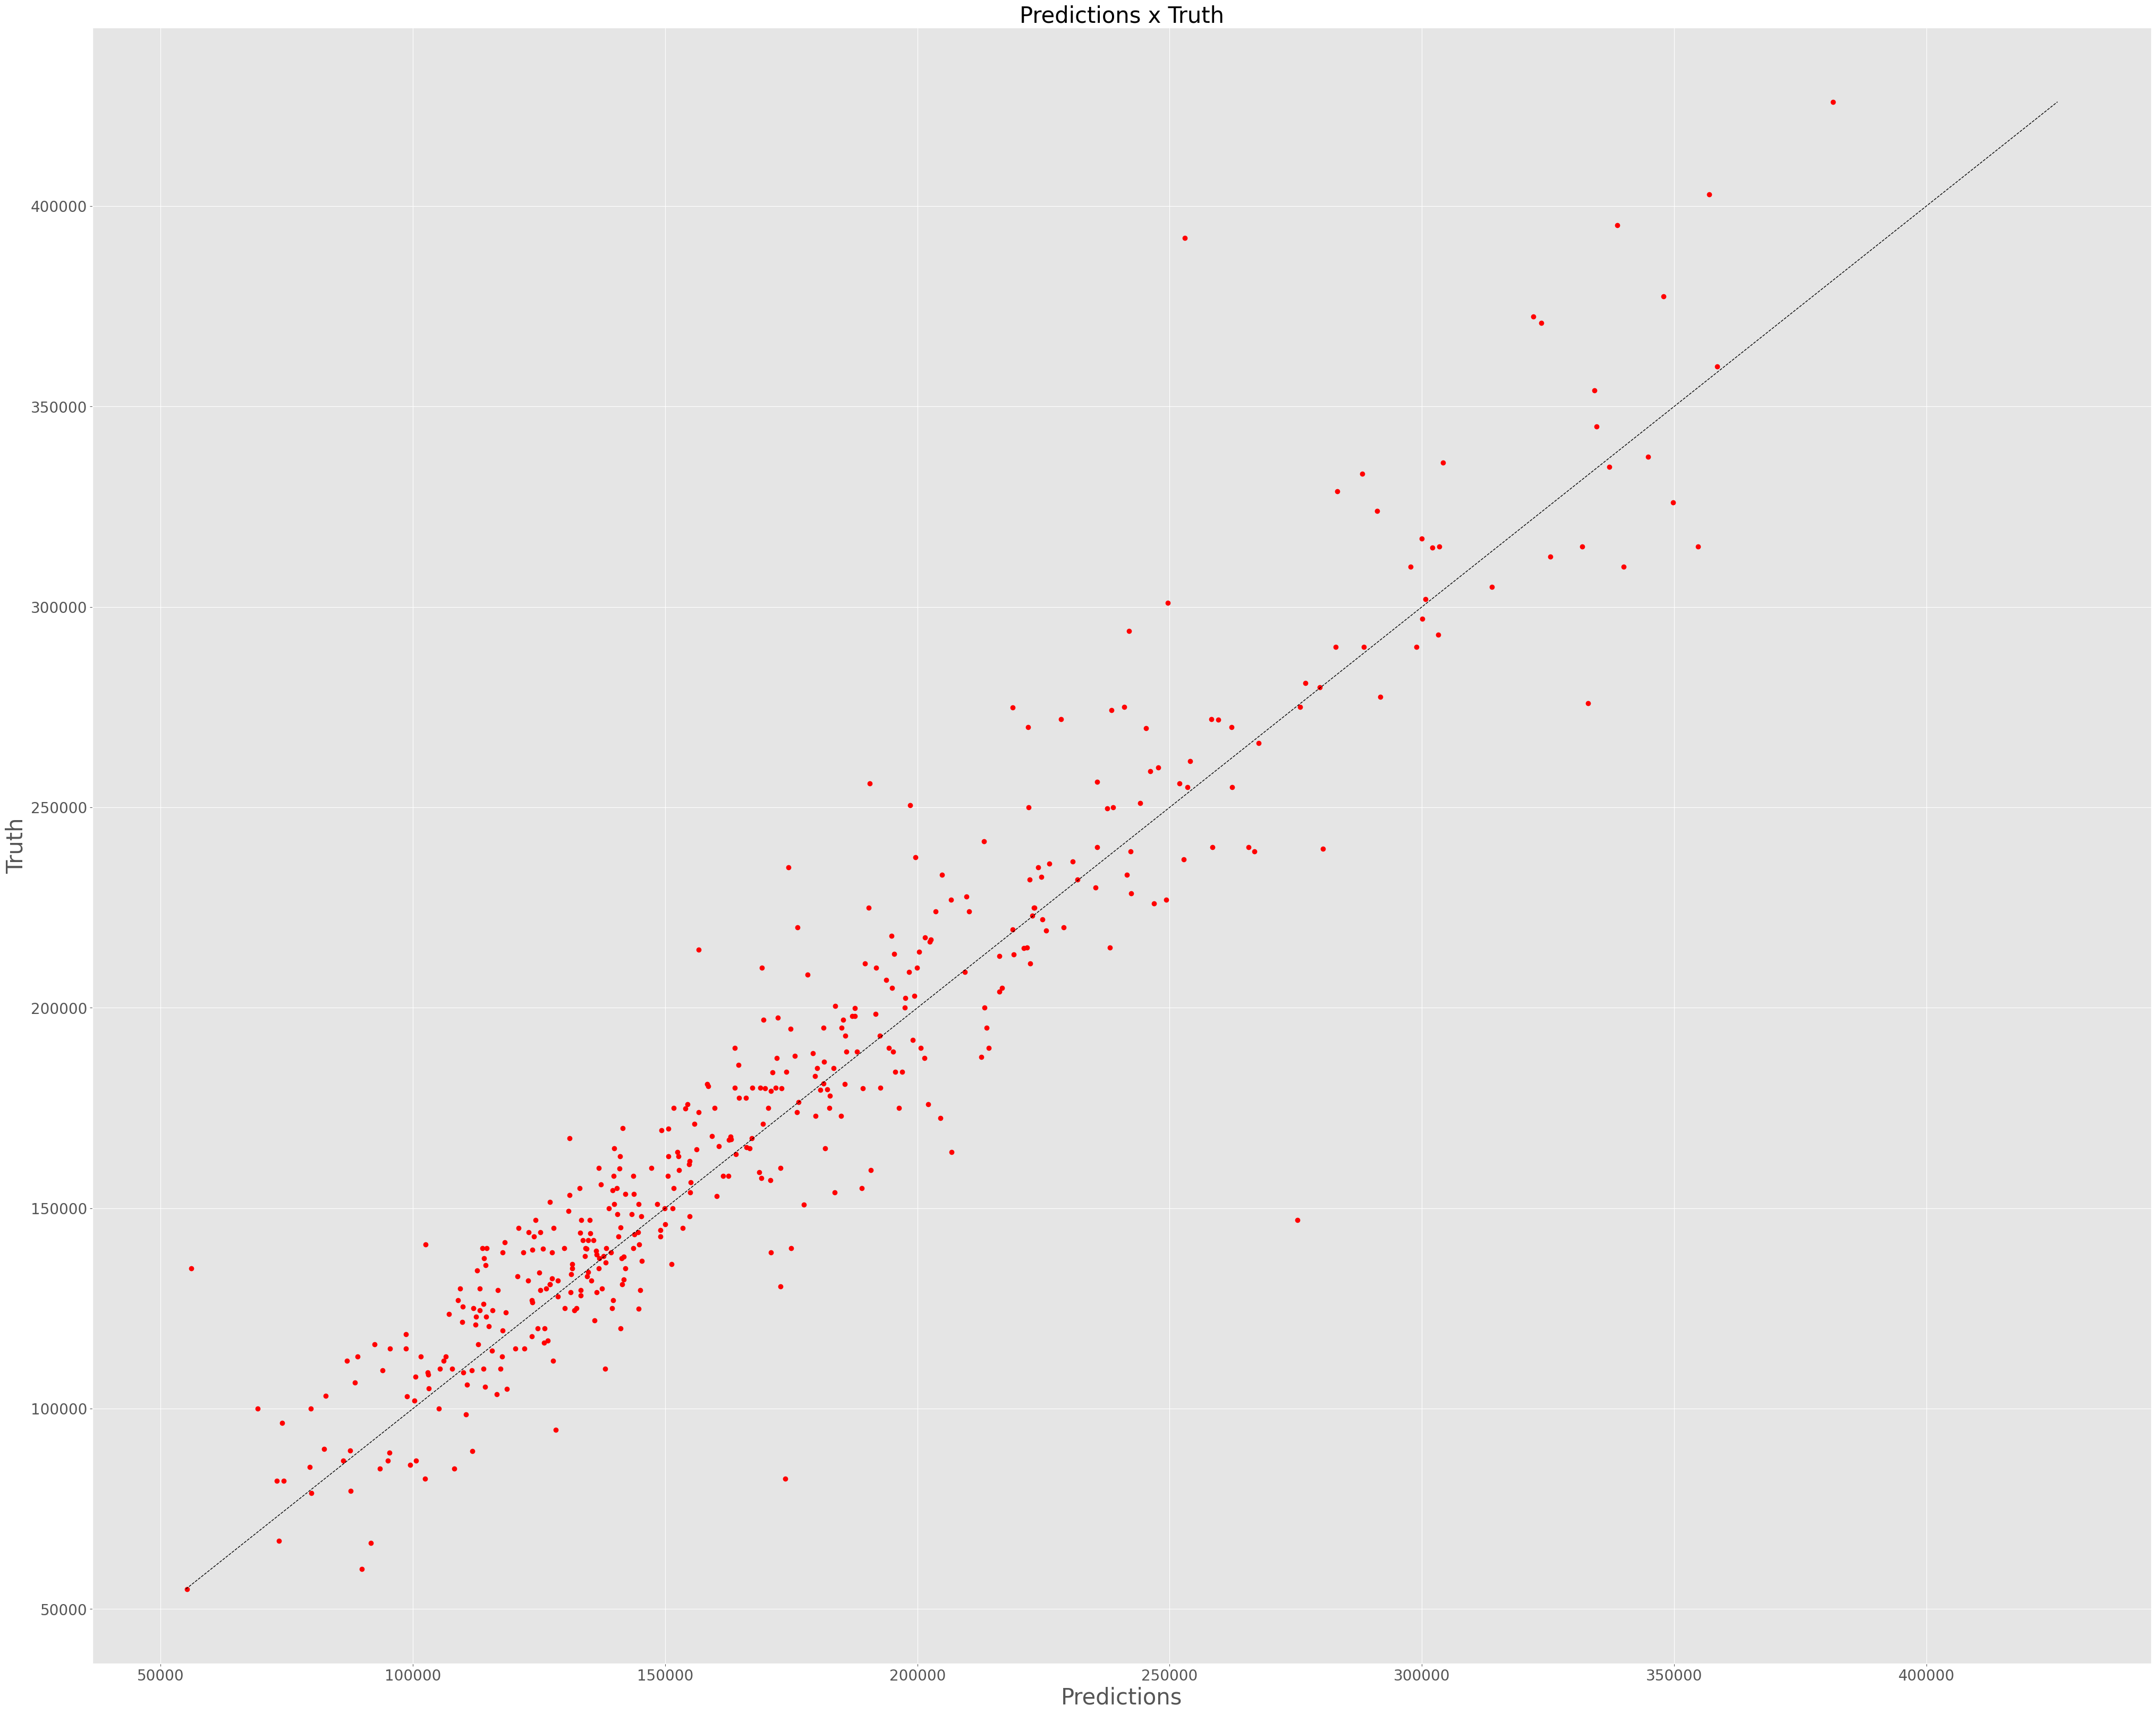

In [58]:
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

fig, ax = plt.subplots(figsize=(50, 40))

plt.style.use('ggplot')
plt.plot(predictions.values, truth.values, 'ro')
plt.xlabel('Predictions', fontsize=30)
plt.ylabel('Truth', fontsize=30)
plt.title('Predictions x Truth', fontsize=30)
ax.plot([truth.min(), truth.max()], [truth.min(), truth.max()], 'k--', lw=1)
plt.show()

In [24]:
def pred_show(pred_y):
    y_predict = list(itertools.islice(pred_y, test.shape[0]))
    y_predict = pd.DataFrame(preProcess_y.inverse_transform(np.array(y_predict).reshape(len(y_predict),1)), columns=['SalePrice'])
    y_predict = y_predict.join(ID)
    print(y_predict)

In [25]:
y_predict = regressor.predict(input_fn=lambda: input_fn(test, pred=True))

In [26]:
pred_show(y_predict)

          SalePrice    Id
0     116171.320312  1461
1     121634.132812  1462
2     169808.265625  1463
3     181649.531250  1464
4     183903.218750  1465
...             ...   ...
1454   90608.703125  2915
1455   92405.046875  2916
1456  170228.687500  2917
1457  111011.687500  2918
1458  234556.046875  2919

[1459 rows x 2 columns]


In [27]:
# Leaky Relu

def leaky_relu(x):
    return tf.nn.relu(x) - 0.01 * tf.nn.relu(-x)

In [28]:
# Model
regressor = tf.contrib.learn.DNNRegressor(feature_columns=feature_cols, 
                                          activation_fn = leaky_relu, hidden_units=[200, 100, 50, 25, 12])
    
# Deep Neural Network Regressor
regressor.fit(input_fn=lambda: input_fn(training_set), steps=2000)

# Test set evaluation
ev = regressor.evaluate(input_fn=lambda: input_fn(testing_set), steps=1)

In [29]:
loss_score2 = ev["loss"]
print("Loss: {0:f}".format(loss_score2))

Loss: 0.003921


In [30]:
# Predictions
y_predict = regressor.predict(input_fn=lambda: input_fn(test, pred=True))

In [31]:
pred_show(y_predict)

          SalePrice    Id
0     128049.007812  1461
1     159778.640625  1462
2     183711.140625  1463
3     193407.890625  1464
4     183618.515625  1465
...             ...   ...
1454   93812.609375  2915
1455   80399.898438  2916
1456  172245.796875  2917
1457   95707.882812  2918
1458  234588.296875  2919

[1459 rows x 2 columns]


In [32]:
#Elu

# Model
regressor = tf.contrib.learn.DNNRegressor(feature_columns=feature_cols, 
                                          activation_fn = tf.nn.elu, hidden_units=[200, 100, 50, 25, 12])
    
# Deep Neural Network Regressor
regressor.fit(input_fn=lambda: input_fn(training_set), steps=2000)

# Test set evaluation
ev = regressor.evaluate(input_fn=lambda: input_fn(testing_set), steps=1)

In [33]:
loss_score3 = ev["loss"]
print("Loss: {0:f}".format(loss_score3))

Loss: 0.003939


In [34]:
# Predictions
y_predict = regressor.predict(input_fn=lambda: input_fn(test, pred=True))

In [35]:
pred_show(y_predict)

          SalePrice    Id
0     128662.273438  1461
1     142374.968750  1462
2     174397.546875  1463
3     192478.375000  1464
4     182033.406250  1465
...             ...   ...
1454   71061.234375  2915
1455   76922.601562  2916
1456  182226.281250  2917
1457  111358.007812  2918
1458  244004.500000  2919

[1459 rows x 2 columns]


In [36]:
# Deep Neural Network for continuous and categorical features

# Import and split
train = train_set.copy()
train.drop('Id', axis=1, inplace=True)
train_numerical = train.select_dtypes(exclude=['object'])
train_numerical.fillna(0, inplace=True)
train_categoric = train.select_dtypes(include=['object'])
train_categoric.fillna('NONE', inplace=True)
train = train_numerical.merge(train_categoric, left_index=True, right_index=True) 

test = test_set.copy()
ID = test.Id
test.drop('Id', axis=1, inplace=True)
test_numerical = test.select_dtypes(exclude=['object'])
test_numerical.fillna(0, inplace=True)
test_categoric = test.select_dtypes(include=['object'])
test_categoric.fillna('NONE', inplace=True)
test = test_numerical.merge(test_categoric, left_index=True, right_index=True) 

In [37]:
# Handling outliers

clf.fit(train_numerical)
y_norm = clf.predict(train_numerical)
y_norm = pd.DataFrame(y_norm, columns=['Top'])
y_norm[y_norm['Top'] == 1].index.values

train_numerical = train_numerical.iloc[y_norm[y_norm['Top'] == 1].index.values]
train_numerical.reset_index(drop=True, inplace=True)

train_categoric = train_categoric.iloc[y_norm[y_norm['Top'] == 1].index.values]
train_categoric.reset_index(drop=True, inplace=True)

train = train.iloc[y_norm[y_norm['Top'] == 1].index.values]
train.reset_index(drop=True, inplace=True)

In [38]:
# Data processing

col_train_num = list(train_numerical.columns)
col_train_num_bis = list(train_numerical.columns)
col_train_cat = list(train_categoric.columns)
col_train_num_bis.remove('SalePrice')

mat_train = np.matrix(train_numerical)
mat_test  = np.matrix(test_numerical)
mat_new = np.matrix(train_numerical.drop('SalePrice', axis=1))
mat_y = np.array(train.SalePrice)

preProcess_y = MinMaxScaler()
preProcess_y.fit(mat_y.reshape(1311,1))

preProcess = MinMaxScaler()
preProcess.fit(mat_train)

preProcess_test = MinMaxScaler()
preProcess_test.fit(mat_new)

train_num_scale = pd.DataFrame(preProcess.transform(mat_train), columns=col_train)
test_num_scale  = pd.DataFrame(preProcess_test.transform(mat_test), columns=col_train_bis)

In [39]:
train[col_train_num] = pd.DataFrame(preProcess.transform(mat_train), columns=col_train_num)
test[col_train_num_bis] = test_num_scale

In [40]:
# List of features
COLUMNS = col_train_num
FEATURES = col_train_num_bis
LABEL = "SalePrice"

FEATURES_CAT = col_train_cat

engineered_features = []

for continuous_feature in FEATURES:
    engineered_features.append(
        tf.contrib.layers.real_valued_column(continuous_feature))

for categorical_feature in FEATURES_CAT:
    sparse_column = tf.contrib.layers.sparse_column_with_hash_bucket(
        categorical_feature, hash_bucket_size=1000)

    engineered_features.append(tf.contrib.layers.embedding_column(sparse_id_column=sparse_column, dimension=16, combiner="sum"))
                                 
# Training set and prediction set with target variables
training_set = train[FEATURES + FEATURES_CAT]
prediction_set = train.SalePrice

# Training set 
x_train, x_test, y_train, y_test = train_test_split(training_set[FEATURES + FEATURES_CAT] ,
                                                    prediction_set, test_size=0.33, random_state=42)
y_train = pd.DataFrame(y_train, columns = [LABEL])
training_set = pd.DataFrame(x_train, columns = FEATURES + FEATURES_CAT).merge(y_train, left_index=True, right_index=True)

In [41]:
# Testing set
testing = test[FEATURES + FEATURES_CAT]

y_test = pd.DataFrame(y_test, columns=[LABEL])
testing_set = pd.DataFrame(x_test, columns=FEATURES + FEATURES_CAT).merge(y_test, left_index=True, right_index=True)

In [42]:
training_set[FEATURES_CAT] = training_set[FEATURES_CAT].applymap(str)
testing_set[FEATURES_CAT] = testing_set[FEATURES_CAT].applymap(str)

def input_fn_new(data_set, training=True):
    continuous_cols = {k: tf.constant(data_set[k].values) for k in FEATURES}
    
    categorical_cols = {k: tf.SparseTensor(
        indices=[[i, 0] for i in range(data_set[k].size)], values = data_set[k].values, dense_shape = [data_set[k].size, 1]) for k in FEATURES_CAT}

    feature_cols = dict(list(continuous_cols.items()) + list(categorical_cols.items()))
    
    if training == True:
        label = tf.constant(data_set[LABEL].values)
        return feature_cols, label    
    return feature_cols  

In [43]:
categorical_cols = {k: tf.SparseTensor(indices=[[i, 0] for i in range(training_set[k].size)], values=training_set[k].values, dense_shape=[training_set[k].size, 1]) for k in FEATURES_CAT}

In [44]:
# Model
regressor = tf.contrib.learn.DNNRegressor(feature_columns = engineered_features, 
                                          activation_fn = tf.nn.relu, hidden_units=[200, 100, 50, 25, 12])

# Deep Neural Network Regressor
regressor.fit(input_fn = lambda: input_fn_new(training_set), steps=2000)

# Test set evaluation
ev = regressor.evaluate(input_fn=lambda: input_fn_new(testing_set, training=True), steps=1)

In [45]:
loss_score4 = ev["loss"]
print("Loss: {0:f}".format(loss_score4))

Loss: 0.002725


In [46]:
# Predictions
y = regressor.predict(input_fn=lambda: input_fn_new(testing_set))

In [47]:
predictions = list(itertools.islice(y, testing_set.shape[0]))
predictions = pd.DataFrame(preProcess_y.inverse_transform(np.array(predictions).reshape(433,1)))

In [48]:
print(predictions)

                 0
0    145018.984375
1    166733.000000
2    213273.234375
3    323716.937500
4    112672.828125
..             ...
428  174932.937500
429  158316.390625
430  110691.820312
431  148378.328125
432  152766.781250

[433 rows x 1 columns]


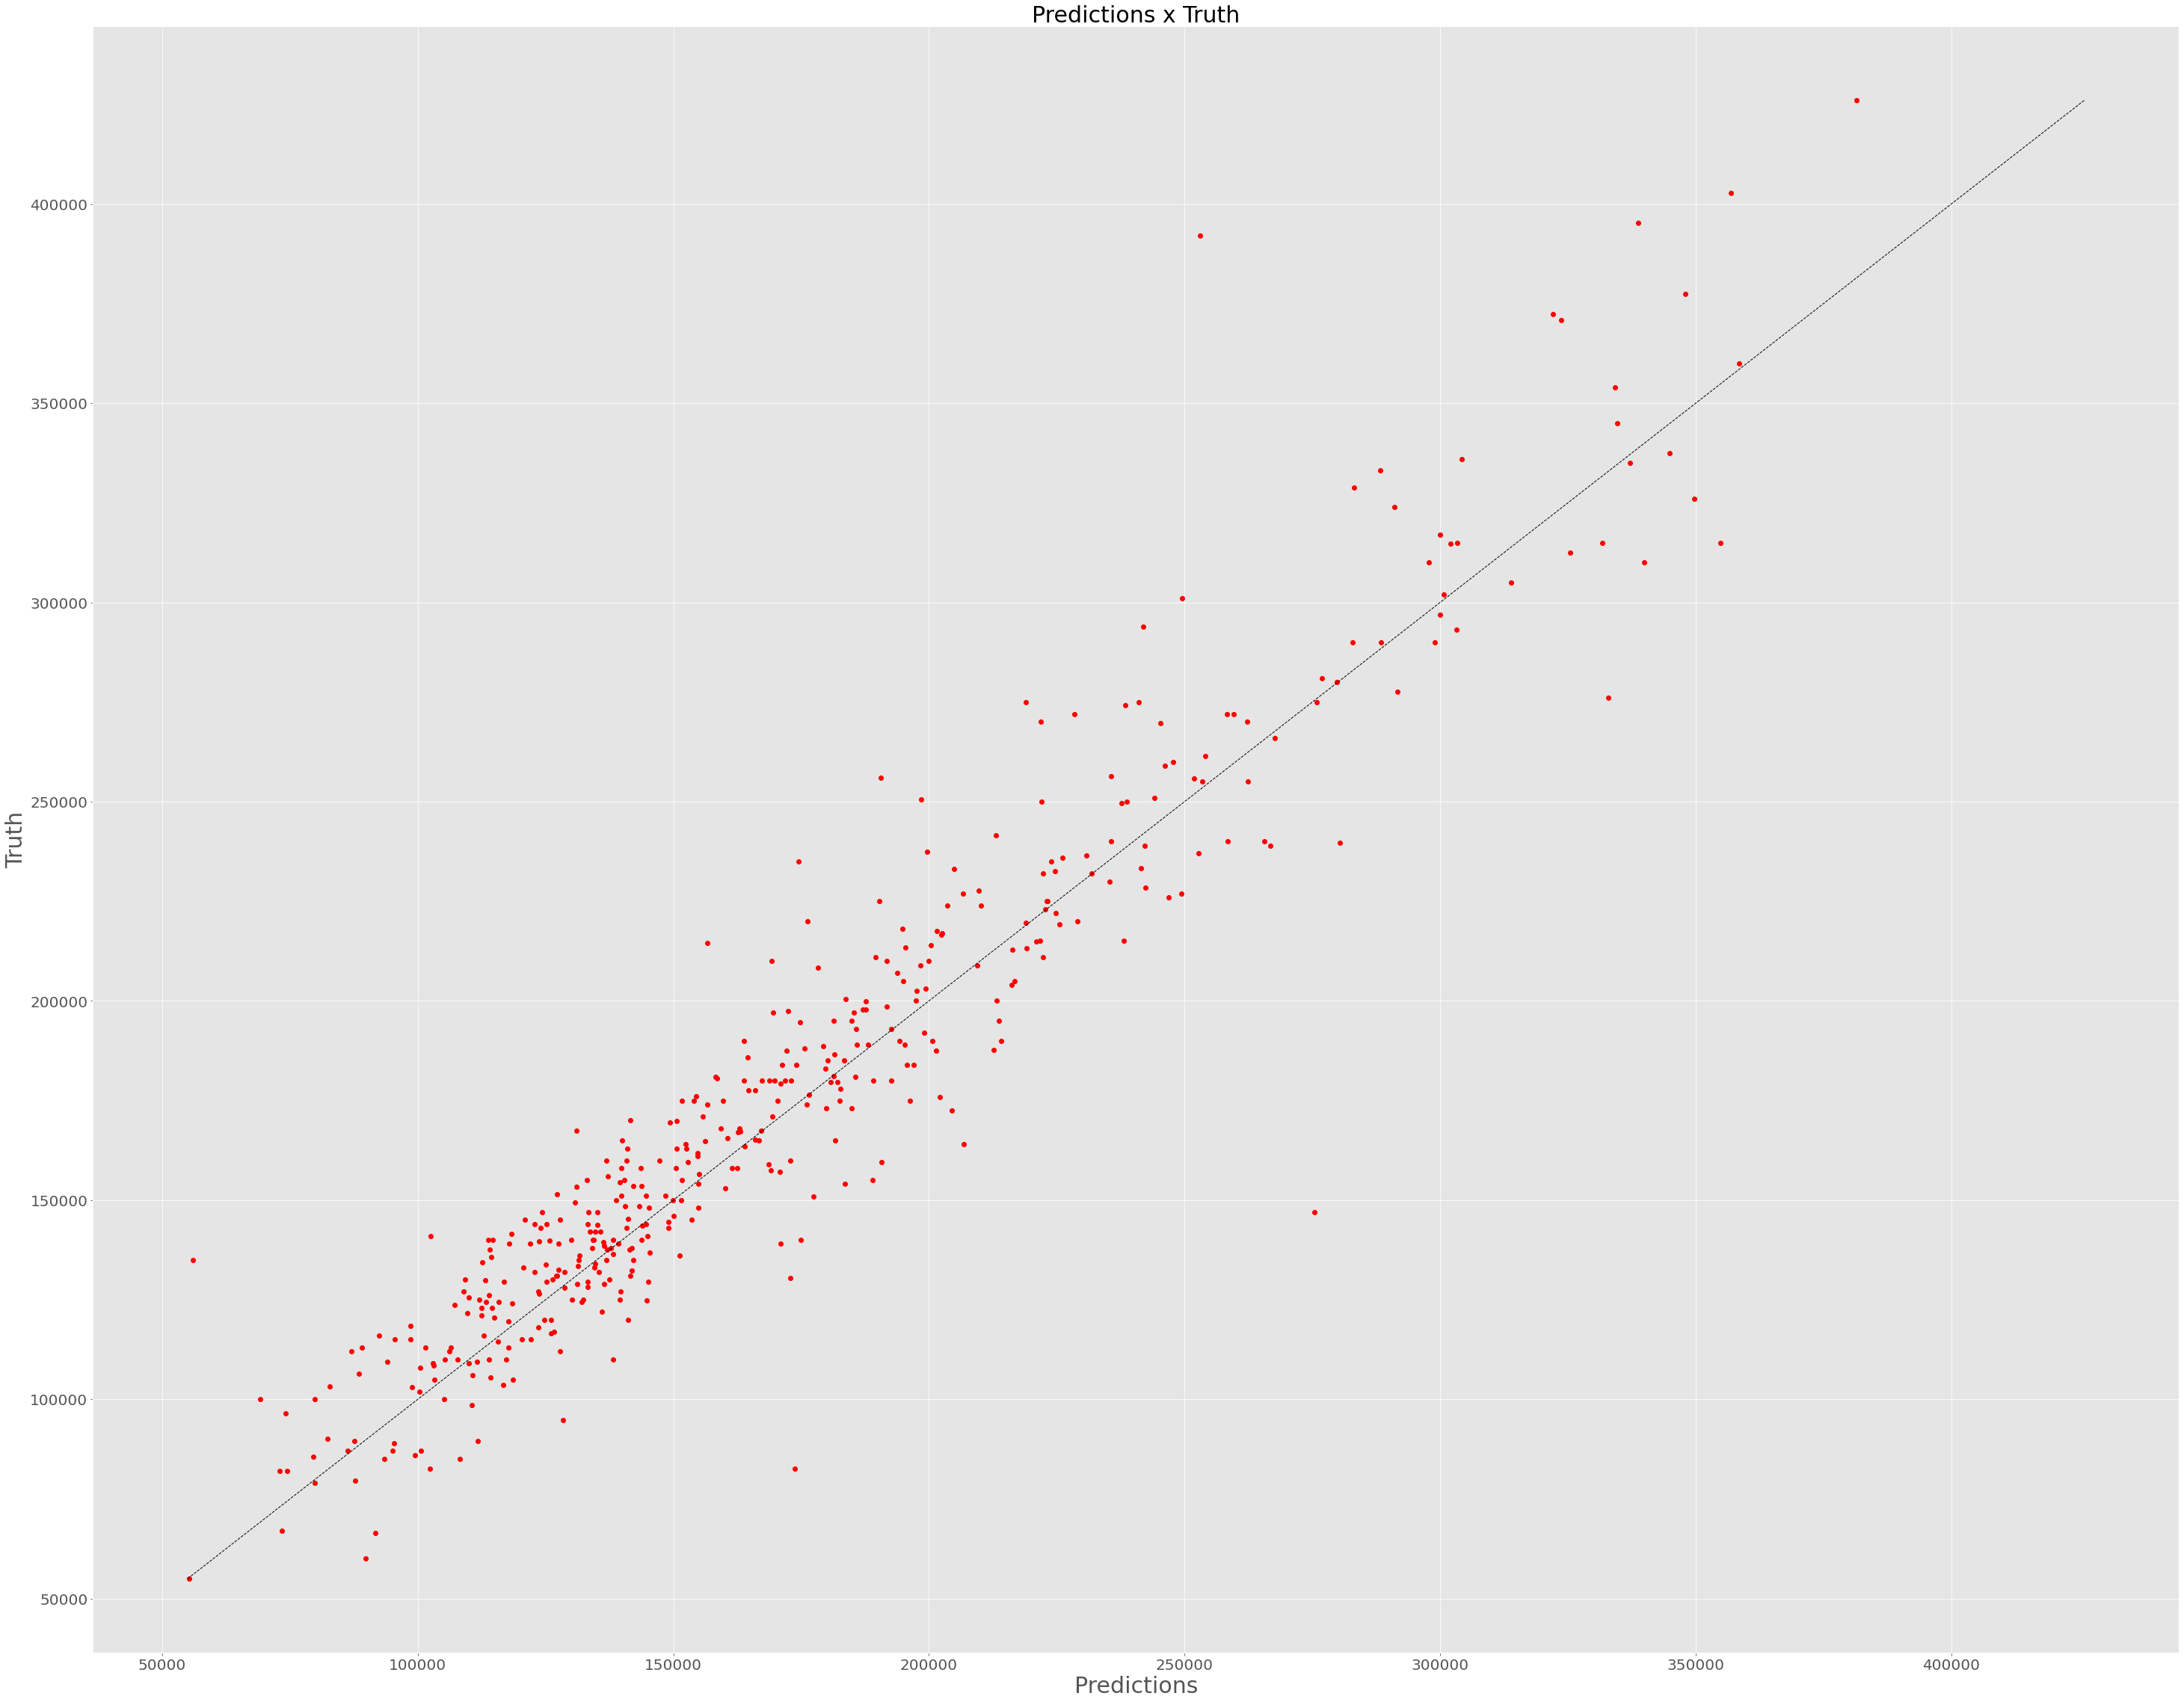

In [49]:
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

fig, ax = plt.subplots(figsize=(50, 40))

plt.style.use('ggplot')
plt.plot(predictions.values, truth.values, 'ro')
plt.xlabel('Predictions', fontsize=30)
plt.ylabel('Truth', fontsize=30)
plt.title('Predictions x Truth', fontsize=30)
ax.plot([truth.min(), truth.max()], [truth.min(), truth.max()], 'k--', lw=1)
plt.show()

In [50]:
y_predict = regressor.predict(input_fn=lambda: input_fn_new(testing, training=False))

In [51]:
pred_show(y_predict)

          SalePrice    Id
0     114933.304688  1461
1     150025.093750  1462
2     179212.093750  1463
3     195631.062500  1464
4     181074.781250  1465
...             ...   ...
1454   71704.148438  2915
1455   81775.929688  2916
1456  161769.812500  2917
1457   95092.703125  2918
1458  233106.140625  2919

[1459 rows x 2 columns]


In [52]:
# Shallow Network

# Model
regressor = tf.contrib.learn.DNNRegressor(feature_columns = engineered_features, 
                                          activation_fn = tf.nn.relu, hidden_units=[1000])

# Deep Neural Network Regressor
regressor.fit(input_fn=lambda: input_fn_new(training_set), steps=2000)

# Test set evaluation
ev = regressor.evaluate(input_fn=lambda: input_fn_new(testing_set, training=True), steps=1)

In [53]:
loss_score5 = ev["loss"]
print("Loss: {0:f}".format(loss_score5))

Loss: 0.002788


In [54]:
y_predict = regressor.predict(input_fn=lambda: input_fn_new(testing, training=False))    

In [55]:
pred_show(y_predict)

          SalePrice    Id
0     121461.281250  1461
1     155011.250000  1462
2     178890.890625  1463
3     198776.937500  1464
4     190121.046875  1465
...             ...   ...
1454   89079.296875  2915
1455   75192.757812  2916
1456  175538.156250  2917
1457  112323.632812  2918
1458  237849.000000  2919

[1459 rows x 2 columns]


In [56]:
list_score = [loss_score1, loss_score2, loss_score3, loss_score4, loss_score5]
list_model = ['Relu_cont', 'LRelu_cont', 'Elu_cont', 'Relu_cont_categ','Shallow_1ku']

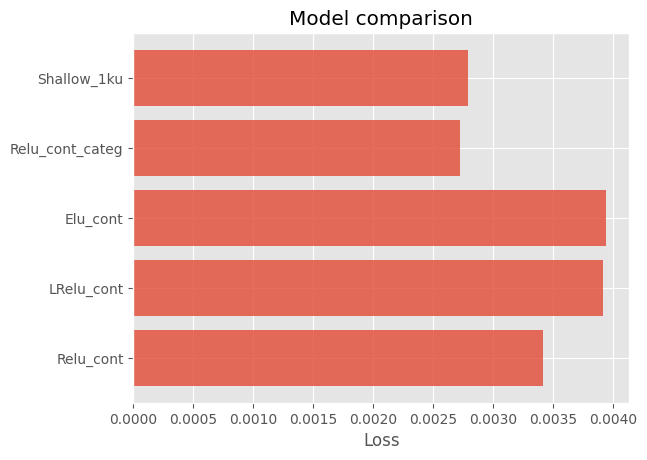

In [57]:
plt.rcdefaults()

plt.style.use('ggplot')
objects = list_model
y_pos = np.arange(len(objects))
performance = list_score
 
plt.barh(y_pos, performance, align='center', alpha=.8)
plt.yticks(y_pos, objects)
plt.xlabel('Loss')
plt.title('Model comparison')
plt.show()